In [6]:
import pandas as pd

In [24]:
#getting all of my files
df_races = pd.read_csv("DataForQA1/races.csv")
#df_races.head()

df_drivers = pd.read_csv("DataForQA1/drivers.csv")
#df_drivers.head()

df_results = pd.read_csv("DataForQA1/results.csv")
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [9]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26459 entries, 0 to 26458
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26459 non-null  int64  
 1   raceId           26459 non-null  int64  
 2   driverId         26459 non-null  int64  
 3   constructorId    26459 non-null  int64  
 4   number           26459 non-null  object 
 5   grid             26459 non-null  int64  
 6   position         26459 non-null  object 
 7   positionText     26459 non-null  object 
 8   positionOrder    26459 non-null  int64  
 9   points           26459 non-null  float64
 10  laps             26459 non-null  int64  
 11  time             26459 non-null  object 
 12  milliseconds     26459 non-null  object 
 13  fastestLap       26459 non-null  object 
 14  rank             26459 non-null  object 
 15  fastestLapTime   26459 non-null  object 
 16  fastestLapSpeed  26459 non-null  object 
 17  statusId    

In [13]:
df_results["raceId"].value_counts()

raceId
800    55
809    47
360    39
368    39
359    39
       ..
657    14
837    14
660    13
827    13
765    10
Name: count, Length: 1110, dtype: int64

In [209]:
# Very suspisious that there are 55 entries for 1 race as modern F1 only has 20 drivers
#df_races.loc[df_races["raceId"] == 800]
# higher number makes more sense as it is the Indy 500, but still a little sketchy

# sort by driver ID to figureout if multiple enteries per driver
#df_temp_results = df_results.sort_values(by="driverId")
#df_temp_results.head()

#df_temp_results.loc[df_temp_results["raceId"] == 800]
#df_results.loc[df_results["raceId"] == 800]
# 4 number 45 cars?
df_drivers.loc[df_drivers["driverId"] == 509]

# after some research there are many duplicate entries as drivers shared cars thus there are multiple (2-3)
# entries for each of these cars AND some drivers drove in multiple cars thus the driver has multiple entries

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
509,509,rathmann,\N,\N,Jim,Rathmann,1928-07-16,American,http://en.wikipedia.org/wiki/Jim_Rathmann


In [29]:
# Very suspisious that there are 47 entries for 1 race as modern F1 only has 20 drivers
df_races.loc[df_races["raceId"] == 809]

# another indy 500 so this is accurate for the reasons listed above.


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
808,809,1953,2,19,Indianapolis 500,1953-05-30,\N,http://en.wikipedia.org/wiki/1953_Indianapolis...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [30]:
# Weird that their are only 10 entries, what year is it?
df_races.loc[df_races["raceId"] == 765]

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
764,765,1958,1,25,Argentine Grand Prix,1958-01-19,\N,http://en.wikipedia.org/wiki/1958_Argentine_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [52]:
df_races.loc[df_races["raceId"] == 1130]

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1110,1130,2024,10,4,Spanish Grand Prix,2024-06-23,13:00:00,https://en.wikipedia.org/wiki/2024_Spanish_Gra...,2024-06-21,11:30:00,2024-06-21,15:00:00,2024-06-22,10:30:00,2024-06-22,14:00:00,\N,\N


In [42]:
df_temp_results.loc[df_temp_results["raceId"] == 1100]
#df_drivers.loc[df_drivers["driverId"] == 830]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
25881,25887,1100,1,131,44,3,2,2,2,18.0,58,+0.179,9158550,49,5,1:20.613,235.703,1
25882,25888,1100,4,117,14,4,3,3,3,15.0,58,+0.769,9159140,53,4,1:20.476,236.105,1
25886,25892,1100,807,210,27,10,7,7,7,6.0,58,+4.939,9163310,46,8,1:21.124,234.219,1
25884,25890,1100,815,9,11,0,5,5,5,11.0,58,+3.320,9161691,53,1,1:20.235,236.814,1
25890,25896,1100,822,51,77,0,11,11,11,0.0,58,+6.513,9164884,46,17,1:22.233,231.060,1
25896,25902,1100,825,210,20,14,17,17,17,0.0,52,\N,\N,52,14,1:21.685,232.610,3
25880,25886,1100,830,9,1,1,1,1,1,25.0,58,2:32:38.371,9158371,49,2,1:20.342,236.498,1
25891,25897,1100,832,6,55,5,12,12,12,0.0,58,+6.594,9164965,53,3,1:20.467,236.131,1
25893,25899,1100,839,214,31,11,14,14,14,0.0,56,\N,\N,44,11,1:21.203,233.991,4
25883,25889,1100,840,117,18,6,4,4,4,12.0,58,+3.082,9161453,50,6,1:20.934,234.769,1


# I am going to Focus on the last 5 Years
## That still should leave me a little more than 2000 entries

In [69]:
df_results = pd.read_csv("DataForQA1/results.csv")
df_results.sort_values('raceId')
df_results.reset_index(inplace=True, drop=True)
#df_results.loc[df_results["raceId"] == 1010]
shortened_race_results = df_results.loc[24197:]
shortened_race_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24197,24203,1010,822,131,77,2,1,1,1,26.0,58,1:25:27.325,5127325,57,1,1:25.580,223.075,1
24198,24204,1010,1,131,44,1,2,2,2,18.0,58,+20.886,5148211,57,2,1:26.057,221.839,1
24199,24205,1010,830,9,33,4,3,3,3,15.0,58,+22.520,5149845,57,3,1:26.256,221.327,1
24200,24206,1010,20,6,5,3,4,4,4,12.0,58,+57.109,5184434,16,8,1:27.954,217.054,1
24201,24207,1010,844,6,16,5,5,5,5,10.0,58,+58.203,5185528,58,4,1:26.926,219.621,1


In [70]:
shortened_race_results["raceId"].value_counts()

raceId
1010    20
1011    20
1012    20
1013    20
1014    20
        ..
1126    20
1123    19
633      1
745      1
717      1
Name: count, Length: 116, dtype: int64

In [87]:
# What are Race Id's 1123 (recent so come back), 633, 745, 717

# US GP 1964 
    # index: 24298
df_races.loc[df_races["raceId"] == 717]

# US GP 1961
    # index: 24297
df_races.loc[df_races["raceId"] == 745]

# Spanish GP 1971
    # index: 24299
df_races.loc[df_races["raceId"] == 633]

# These 3 entries can be dropped as we are only looking for data post 2018
shortened_race_results.loc[shortened_race_results['raceId'] == 717]
shortened_race_results.loc[shortened_race_results['raceId'] == 745]
shortened_race_results.loc[shortened_race_results['raceId'] == 633]
shortened_race_results.drop([24298, 24297, 24299], inplace=True, axis=0)


C:\Users\asmit\AppData\Local\Temp\ipykernel_20868\982051822.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortened_race_results.drop([24298, 24297, 24299], inplace=True, axis=0)


In [88]:
shortened_race_results["raceId"].value_counts()

raceId
1010    20
1011    20
1012    20
1013    20
1014    20
        ..
1126    20
1128    20
1127    20
1129    20
1123    19
Name: count, Length: 113, dtype: int64

In [75]:
# Austrailian GP 2024 - Makes Sense as 1 car couldn't compete as it was totaled BEFORE qualifying
    # (I'm looking at you Alex Albon)
df_races.loc[df_races["raceId"] == 1123]

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1103,1123,2024,3,1,Australian Grand Prix,2024-03-24,04:00:00,https://en.wikipedia.org/wiki/2024_Australian_...,2024-03-22,01:30:00,2024-03-22,05:00:00,2024-03-23,01:30:00,2024-03-23,05:00:00,\N,\N


## The number of Entries per race now appears to be good

### Though I am curious about the 2023 Emilia Romagna GP as it was canceled
- I'd beleive that there would be 0 entries as it was canceled

In [95]:
# As found earlier, the NEXT GP (the 2024 Spanish GP is raceID = 1130)
    # the 2023 "Imola" GP was 27 races ago
df_races.loc[df_races["raceId"] == 1103]
# this is weird Imola should be raceID==1103
#lets check the race before and after to confirm
# Before - 2023 Miami GP
df_races.loc[df_races["raceId"] == 1102]
# After - 2023 Monaco GP
df_races.loc[df_races["raceId"] == 1104]

# so the DS creators left canceled GPs empty not even assigning them a raceId and skipping their respective numbers.
# Thus logically when I search the shortened results set it should not contain that raceId - TRUE!
shortened_race_results.loc[shortened_race_results['raceId'] == 1103]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId


In [96]:
# Now I am curious how they handle races that haven't happened yet.
# noteably I mentioned that I found the next GP (Ran on 6/23/24, but as of when I cloned the data and when I am doing
# this section of the report it has not ran yet)
shortened_race_results.loc[shortened_race_results['raceId'] == 1130]

# Handled the same as the canceled GP.

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId


C:\Users\asmit\AppData\Local\Temp\ipykernel_20868\718962636.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_4_race_results['position'] = no_4_race_results['position'].astype(int)


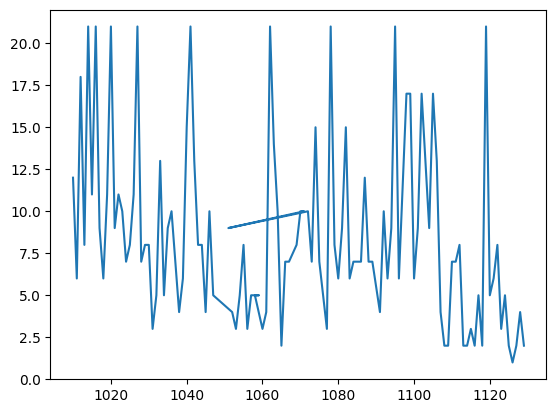

In [135]:
import matplotlib.pyplot as plt

# lets look at where #4 has finished in everyrace throughout the past 5 years

#create appropriate data set
no_4_race_results = shortened_race_results.loc[shortened_race_results['number'] == "4"]
#no_4_race_results.info() # Kinda Weird its not stored as an int
no_4_race_results.loc[no_4_race_results['position'] == r"\N", 'position'] = "21"
no_4_race_results['position'] = no_4_race_results['position'].astype(int,)
no_4_race_results.head()

x = no_4_race_results['raceId']
y = no_4_race_results['position']

plt.plot(x,y)
plt.show()

In [170]:
# Why is there a random line going backwards on the graph?
no_4_race_results.loc[24903:25531]
# the race ids are not in order, so I will sort those

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24903,24909,1045,846,1,4,9,4,4,4,12.0,57,+11.337,10798852,53,7,1:33.588,208.180,1
24929,24935,1046,846,1,4,19,10,10,10,1.0,87,+19.541,5494655,85,11,0:57.270,222.713,1
24944,24950,1047,846,1,4,4,5,5,5,10.0,55,+1:00.729,5849374,53,12,1:41.964,196.092,1
24963,24969,1052,846,1,4,7,4,4,4,12.0,56,+46.466,5570363,38,6,1:34.396,206.398,1
24982,24988,1053,846,1,4,7,3,3,3,15.0,63,+23.702,7378300,63,3,1:18.259,225.819,1
25004,25010,1054,846,1,4,7,5,5,5,10.0,66,+51.369,5722790,55,7,1:21.696,205.038,1
25027,25033,1055,846,1,4,9,8,8,8,4.0,65,\N,\N,56,7,1:21.279,207.064,11
25042,25048,1056,846,1,4,5,3,3,3,15.0,78,+19.427,5956247,76,7,1:14.670,160.883,1
25064,25070,1057,846,1,4,9,5,5,5,10.0,51,+4.754,8021164,41,7,1:45.326,205.180,1
25084,25090,1059,846,1,4,8,5,5,5,10.0,53,+1:04.032,5309802,52,6,1:37.425,215.870,1


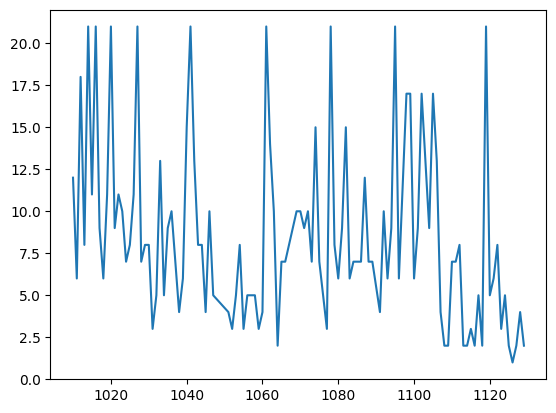

In [146]:
x = no_4_race_results['raceId'].sort_values()
y = no_4_race_results['position']

plt.plot(x,y)
plt.show()

In [153]:
# there is no entry for race 1068... why?
df_races.loc[df_races["raceId"] == 1068]
# confusing... the race before and after raceID 1068 were sequential so why there is an extra i don't know

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time


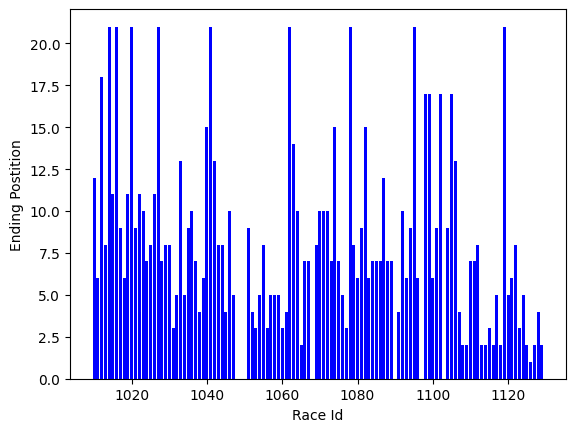

In [171]:
# lets see if graphing different shows us anything useful
x = no_4_race_results['raceId']
y = no_4_race_results['position']

#plt.plot(x,y)
plt.bar(x,y, color="b")
plt.xlabel('Race Id')
plt.ylabel('Ending Postition')
plt.show()

In [ ]:
# based off of this graph it appears there are a few races missing around 1050 which on the previous 
# graph just looked like he finished in the same place multiple races in a row.
    # missing races: 1048-1050, 1090, 1097 ,1103

In [183]:
#Trying to find why there are bars missing
no_4_race_results.loc[24750:25531].sort_values('raceId')
# missing races: 1048-1050, 1090, 1097,1103

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24588,24593,1029,846,1,4,10,8,8,8,4.0,71,+11.204,5605882,63,7,1:12.328,214.472,1
24608,24613,1030,846,1,4,6,8,8,8,4.0,54,\N,\N,50,12,1:43.026,194.071,11
24622,24628,1031,846,1,4,3,3,3,3,16.0,71,+5.491,5461230,71,1,1:07.475,230.378,1
24644,24650,1032,846,1,4,9,5,5,5,10.0,71,+1:01.470,5032153,66,5,1:07.193,231.345,1
24672,24678,1033,846,1,4,8,13,13,13,0.0,69,\N,\N,42,8,1:19.945,197.280,11
24684,24690,1034,846,1,4,5,5,5,5,10.0,52,+22.277,5303560,41,12,1:30.058,235.488,1
24708,24714,1035,846,1,4,10,9,9,9,2.0,52,+1:05.544,4847537,49,11,1:30.698,233.826,1
24729,24735,1036,846,1,4,8,10,10,10,1.0,65,\N,\N,56,13,1:22.392,203.393,11
24746,24752,1037,846,1,4,10,7,7,7,6.0,44,+43.774,5092535,39,11,1:48.552,232.279,1
24763,24769,1038,846,1,4,6,4,4,4,12.0,53,+6.000,6432056,50,7,1:24.232,247.587,1


In [192]:
# missing races: 1048-1050, 1090, 1097,1103
# determine what races are
df_races.loc[df_races["raceId"] == 1048] #no race number 1048
df_races.loc[df_races["raceId"] == 1049] #no race number 1049
df_races.loc[df_races["raceId"] == 1050] #no race number 1050
df_races.loc[df_races["raceId"] == 1090] #no race number 1090
df_races.loc[df_races["raceId"] == 1097] #no race number 1097
df_races.loc[df_races["raceId"] == 1103] #no race number 1103

# The creators of the data set just didn't order things well

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time


In [195]:
# lets see what we can say about the number 4 driver from the .describe feature
no_4_race_results.describe()

#this tells us that on average
    # He starts at ~8th on the grid
    # He ends at ~8th on the grid
    # He scores on average ~6 pts per race

,resultId,raceId,driverId,constructorId,grid,position,positionOrder,points,laps,statusId
count,113.000000,113.000000,113.0,113.0,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,25333.088496,1069.336283,846.0,1.0,7.831858,8.477876,8.274336,6.495575,56.707965,5.619469
std,654.001250,35.408738,0.0,0.0,4.157400,5.286603,4.851818,6.123905,14.424484,15.093943
min,24214.000000,1010.000000,846.0,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,24769.000000,1038.000000,846.0,1.0,5.000000,5.000000,5.000000,1.000000,52.000000,1.000000
50%,25335.000000,1070.000000,846.0,1.0,7.000000,7.000000,7.000000,6.000000,57.000000,1.000000
75%,25891.000000,1100.000000,846.0,1.0,10.000000,10.000000,10.000000,10.000000,66.000000,4.000000
max,26446.000000,1129.000000,846.0,1.0,19.000000,21.000000,20.000000,25.000000,87.000000,131.000000


<Axes: xlabel='Starting Pos', ylabel='Ending Pos'>

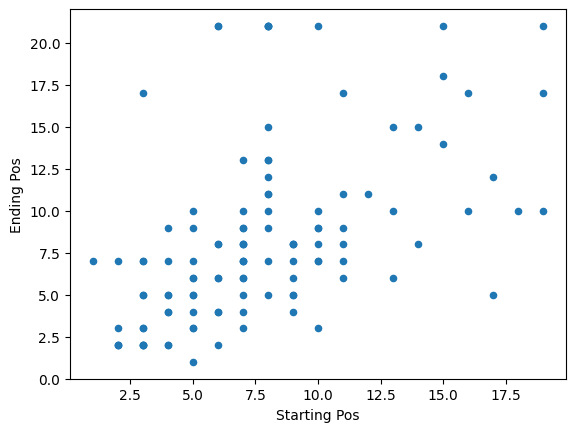

In [212]:
# starting position on x, ending position on y
no_4_race_results.plot(kind="scatter", x="grid", y="position", xlabel="Starting Pos", ylabel='Ending Pos')

In [204]:
# what are all the startings for the ending 21's
no_4_race_results.loc[no_4_race_results['position'] == 21]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24296,24302,1014,846,1,4,10,21,R,20,0.0,44,\N,\N,28,18,1:22.561,202.977,4
24339,24345,1016,846,1,4,8,21,R,20,0.0,8,\N,\N,4,20,1:18.023,201.217,22
24417,24423,1020,846,1,4,19,21,R,18,0.0,25,\N,\N,16,18,1:31.081,180.788,75
24559,24565,1027,846,1,4,8,21,R,20,0.0,48,\N,\N,46,19,1:21.643,189.782,54
24835,24841,1041,846,1,4,8,21,R,16,0.0,42,\N,\N,40,17,1:32.328,200.727,131
25174,25180,1062,846,1,4,6,21,R,15,0.0,2,\N,\N,\N,0,\N,\N,4
25498,25504,1078,846,1,4,8,21,R,19,0.0,39,\N,\N,37,14,1:33.411,208.575,4
25817,25823,1095,846,1,4,6,21,R,18,0.0,50,\N,\N,48,18,1:15.855,204.500,6
26259,26265,1119,846,1,4,15,21,R,20,0.0,2,\N,\N,2,20,1:59.327,187.079,3


In [205]:
# what are all the endings for the starting 1's
no_4_race_results.loc[no_4_race_results['grid'] == 1]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
25246,25252,1066,846,1,4,1,7,7,7,7.0,53,+1:27.224,5528225,39,1,1:37.423,216.096,1
